In [777]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data = pd.read_csv("01train.csv")
data.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,手機電池電量,內容容量比率,Underclocking
0,63.833333,43.213333,231.000000,61.255411,0.999244,0
1,57.857143,58.053333,92.090000,91.393846,0.950294,1
2,36.714286,36.661527,836.239303,68.931202,1.000000,0
3,41.571429,63.213333,588.800000,54.455267,0.918970,1
4,49.404762,52.486667,683.900000,61.922799,0.906411,0


In [778]:
data.describe()

,手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,手機電池電量,內容容量比率,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,45.294944,52.784871,656.507337,75.190124,0.833713,0.428132
std,15.546263,64.786127,717.237752,14.008806,12.506317,0.494871
min,8.047619,2.562656,-8000.000000,47.889610,-600.000000,0.000000
25%,34.880952,43.504429,224.700000,62.761544,0.802960,0.000000
50%,47.023810,53.053333,413.100000,76.677489,0.937191,0.000000
75%,57.345238,60.650000,834.969651,86.821260,0.987258,1.000000
max,79.547619,4000.000000,4412.000000,100.000000,500.000000,1.000000


In [779]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
X_all=data.iloc[:,:-1].values #把data中第一個column到最後一個column之前的data存入X_all(特徵)
Y_all=data['Underclocking'].values #指定名稱為"Underclocking"的那個column存入Y_all(label)

print(X_all) #查看一下特徵的data
print(Y_all) #查看一下答案的data

[[6.38333333e+01 4.32133333e+01 2.31000000e+02 6.12554113e+01
  9.99244224e-01]
 [5.78571429e+01 5.80533333e+01 9.20900000e+01 9.13938462e+01
  9.50293665e-01]
 [3.67142857e+01 3.66615270e+01 8.36239303e+02 6.89312023e+01
  1.00000000e+00]
 ...
 [2.04523809e+01 4.16333333e+01 1.17600000e+02 5.30663781e+01
  8.89574337e-01]
 [4.70714286e+01 5.79466667e+01 2.65600000e+02 8.01226551e+01
  7.29295941e-01]
 [6.27857143e+01 5.41866667e+01 2.70600000e+03 8.57323232e+01
  9.20181727e-01]]
[0 1 0 ... 0 0 0]


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEO

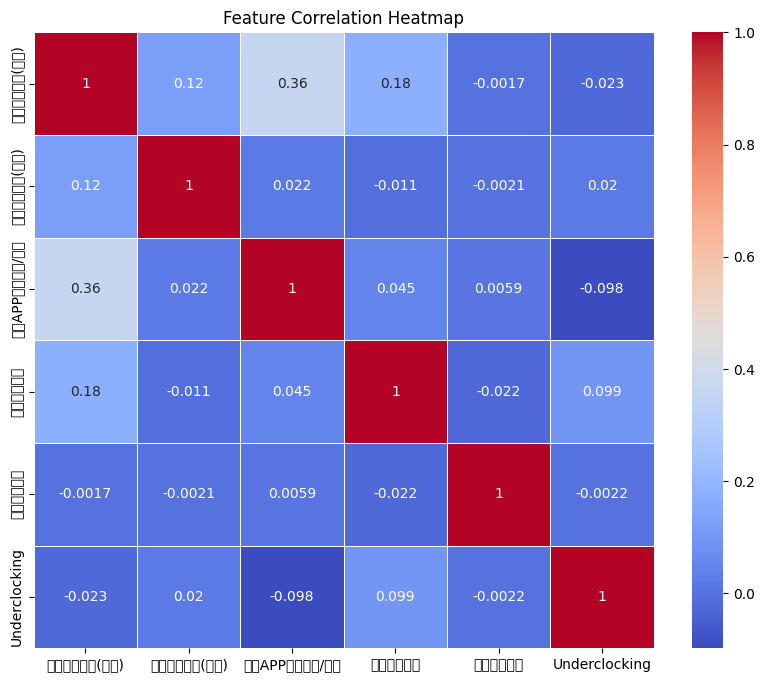

In [780]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #各參數代表的意思請查閱seaborn.heatmap官網的說明
plt.title('Feature Correlation Heatmap')
plt.show()

In [781]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 1.5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized

data=outlier_del(data,name_list_outlier)

手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)
手機電池電量
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3528,)
內容容量比率
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3307,)


In [782]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)

In [783]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=2000, 
                             learning_rate= 0.01,
                             max_depth=4,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(trainX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7342606149341142
測試集:  0.6968403074295474


In [784]:
#Cross-validation
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

df =data
X = df[['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']].values
Y = df['Underclocking'].values

In [785]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
params['max_depth'] = 4
params['learning_rate'] = 0.01
params['gamma'] = 5

d_train = xgboost.DMatrix(trainX, label=trainY)
d_valid = xgboost.DMatrix(testX, label=testY)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

y_train = bst.predict(xgboost.DMatrix(trainX))
bst = xgboost.train(params, d_train, 800, watchlist, early_stopping_rounds=100, verbose_eval=10)
y_pred = bst.predict(xgboost.DMatrix(testX))
print("Accuracy: ", str(sum(trainY == (y_train > 0.5))/trainY.shape[0]))
print("Accuracy: ", str(sum(testY == (y_pred > 0.5))/testY.shape[0]))

[0]	train-logloss:0.67806	valid-logloss:0.68857


[10]	train-logloss:0.66181	valid-logloss:0.67538
[20]	train-logloss:0.64813	valid-logloss:0.66453
[30]	train-logloss:0.63643	valid-logloss:0.65564
[40]	train-logloss:0.62619	valid-logloss:0.64763
[50]	train-logloss:0.61679	valid-logloss:0.64037
[60]	train-logloss:0.60848	valid-logloss:0.63446
[70]	train-logloss:0.60094	valid-logloss:0.62920
[80]	train-logloss:0.59443	valid-logloss:0.62482
[90]	train-logloss:0.58852	valid-logloss:0.62093
[100]	train-logloss:0.58319	valid-logloss:0.61754
[110]	train-logloss:0.57812	valid-logloss:0.61465
[120]	train-logloss:0.57359	valid-logloss:0.61189
[130]	train-logloss:0.56887	valid-logloss:0.60954
[140]	train-logloss:0.56470	valid-logloss:0.60731


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[150]	train-logloss:0.56100	valid-logloss:0.60538
[160]	train-logloss:0.55767	valid-logloss:0.60331
[170]	train-logloss:0.55442	valid-logloss:0.60137
[180]	train-logloss:0.55148	valid-logloss:0.59960
[190]	train-logloss:0.54873	valid-logloss:0.59802
[200]	train-logloss:0.54572	valid-logloss:0.59583
[210]	train-logloss:0.54296	valid-logloss:0.59366
[220]	train-logloss:0.54055	valid-logloss:0.59189
[230]	train-logloss:0.53838	valid-logloss:0.59060
[240]	train-logloss:0.53641	valid-logloss:0.58928
[250]	train-logloss:0.53481	valid-logloss:0.58817
[260]	train-logloss:0.53350	valid-logloss:0.58717
[270]	train-logloss:0.53206	valid-logloss:0.58625
[280]	train-logloss:0.53186	valid-logloss:0.58614
[290]	train-logloss:0.53186	valid-logloss:0.58614
[300]	train-logloss:0.53186	valid-logloss:0.58614
[310]	train-logloss:0.53186	valid-logloss:0.58615
[320]	train-logloss:0.53186	valid-logloss:0.58615
[330]	train-logloss:0.53186	valid-logloss:0.58615
[340]	train-logloss:0.53186	valid-logloss:0.58615
